# IMPORTING LIBRARIES

In [1]:
import sys
sys.path.append("../")
from helper_functions import *

c:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA PREPARATION

## Importing Data

In [3]:
x_train = np.load("Data/xtrain.npy")
y_test = np.load("Data/ytest.npy")
x_test = np.load("Data/xtest.npy")
y_train = np.load("Data/ytrain.npy")

## Putting Data Together

In [4]:
x = np.vstack([x_train, x_test])
y = np.concatenate([y_train, y_test], axis=0)

## Class Weighting

In [5]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights = {index:value for index,value in enumerate(weights)}
weights

{0: 0.6519291273389634,
 1: 1.3608710680954026,
 2: 1.2602432778489117,
 3: 2.074835309617918,
 4: 0.6133831892186647,
 5: 1.5328012458633444,
 6: 2.309090909090909,
 7: 0.7755343248300994,
 8: 1.1202162469768104,
 9: 0.741012610577828,
 10: 0.8275354703100368}

# MODELLING

## Initial Modelling

In [8]:
models = {
  'Logistic Regression': LogisticRegression(),
  'Decision Tree': DecisionTreeClassifier(),
  'KNN': KNeighborsClassifier(),
  'SVC': SVC(),
  'AdaBoost': AdaBoostClassifier(),
  'Gradient Boosting': GradientBoostingClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'CatBoost': CatBoostClassifier(),
  'LightGBM': LGBMClassifier()
}

In [9]:
initial_models = Train_Classifiers(models=models, x=x, y=y)

In [10]:
initial_models.fit()

Training Logistic Regression
Logistic Regression Model Trained
------------------
Training Decision Tree
Decision Tree Model Trained
------------------
Training KNN
KNN Model Trained
------------------
Training SVC
SVC Model Trained
------------------
Training AdaBoost
AdaBoost Model Trained
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
------------------
Training Random Forest
Random Forest Model Trained
------------------
Training XGBoost
XGBoost Model Trained
------------------
Training CatBoost
Learning rate set to 0.086913
0:	learn: 2.2823870	total: 1.42s	remaining: 23m 35s
1:	learn: 2.1905743	total: 2.67s	remaining: 22m 15s
2:	learn: 2.1165736	total: 3.95s	remaining: 21m 52s
3:	learn: 2.0480047	total: 5.25s	remaining: 21m 47s
4:	learn: 1.9843350	total: 6.55s	remaining: 21m 43s
5:	learn: 1.9338305	total: 7.8s	remaining: 21m 32s
6:	learn: 1.8875016	total: 9.12s	remaining: 21m 33s
7:	learn: 1.8378636	total: 10.4s	remaining: 21m 27s
8:	learn: 1.7939754

In [11]:
initial_models.score()

Logistic Regression: 0.6850793650793651
Decision Tree: 0.41523809523809524
KNN: 0.6076190476190476
SVC: 0.6755555555555556
AdaBoost: 0.5047619047619047
Gradient Boosting: 0.6488888888888888
Random Forest: 0.6253968253968254
XGBoost: 0.6711111111111111
CatBoost: 0.6876190476190476
LightGBM: 0.6641269841269841


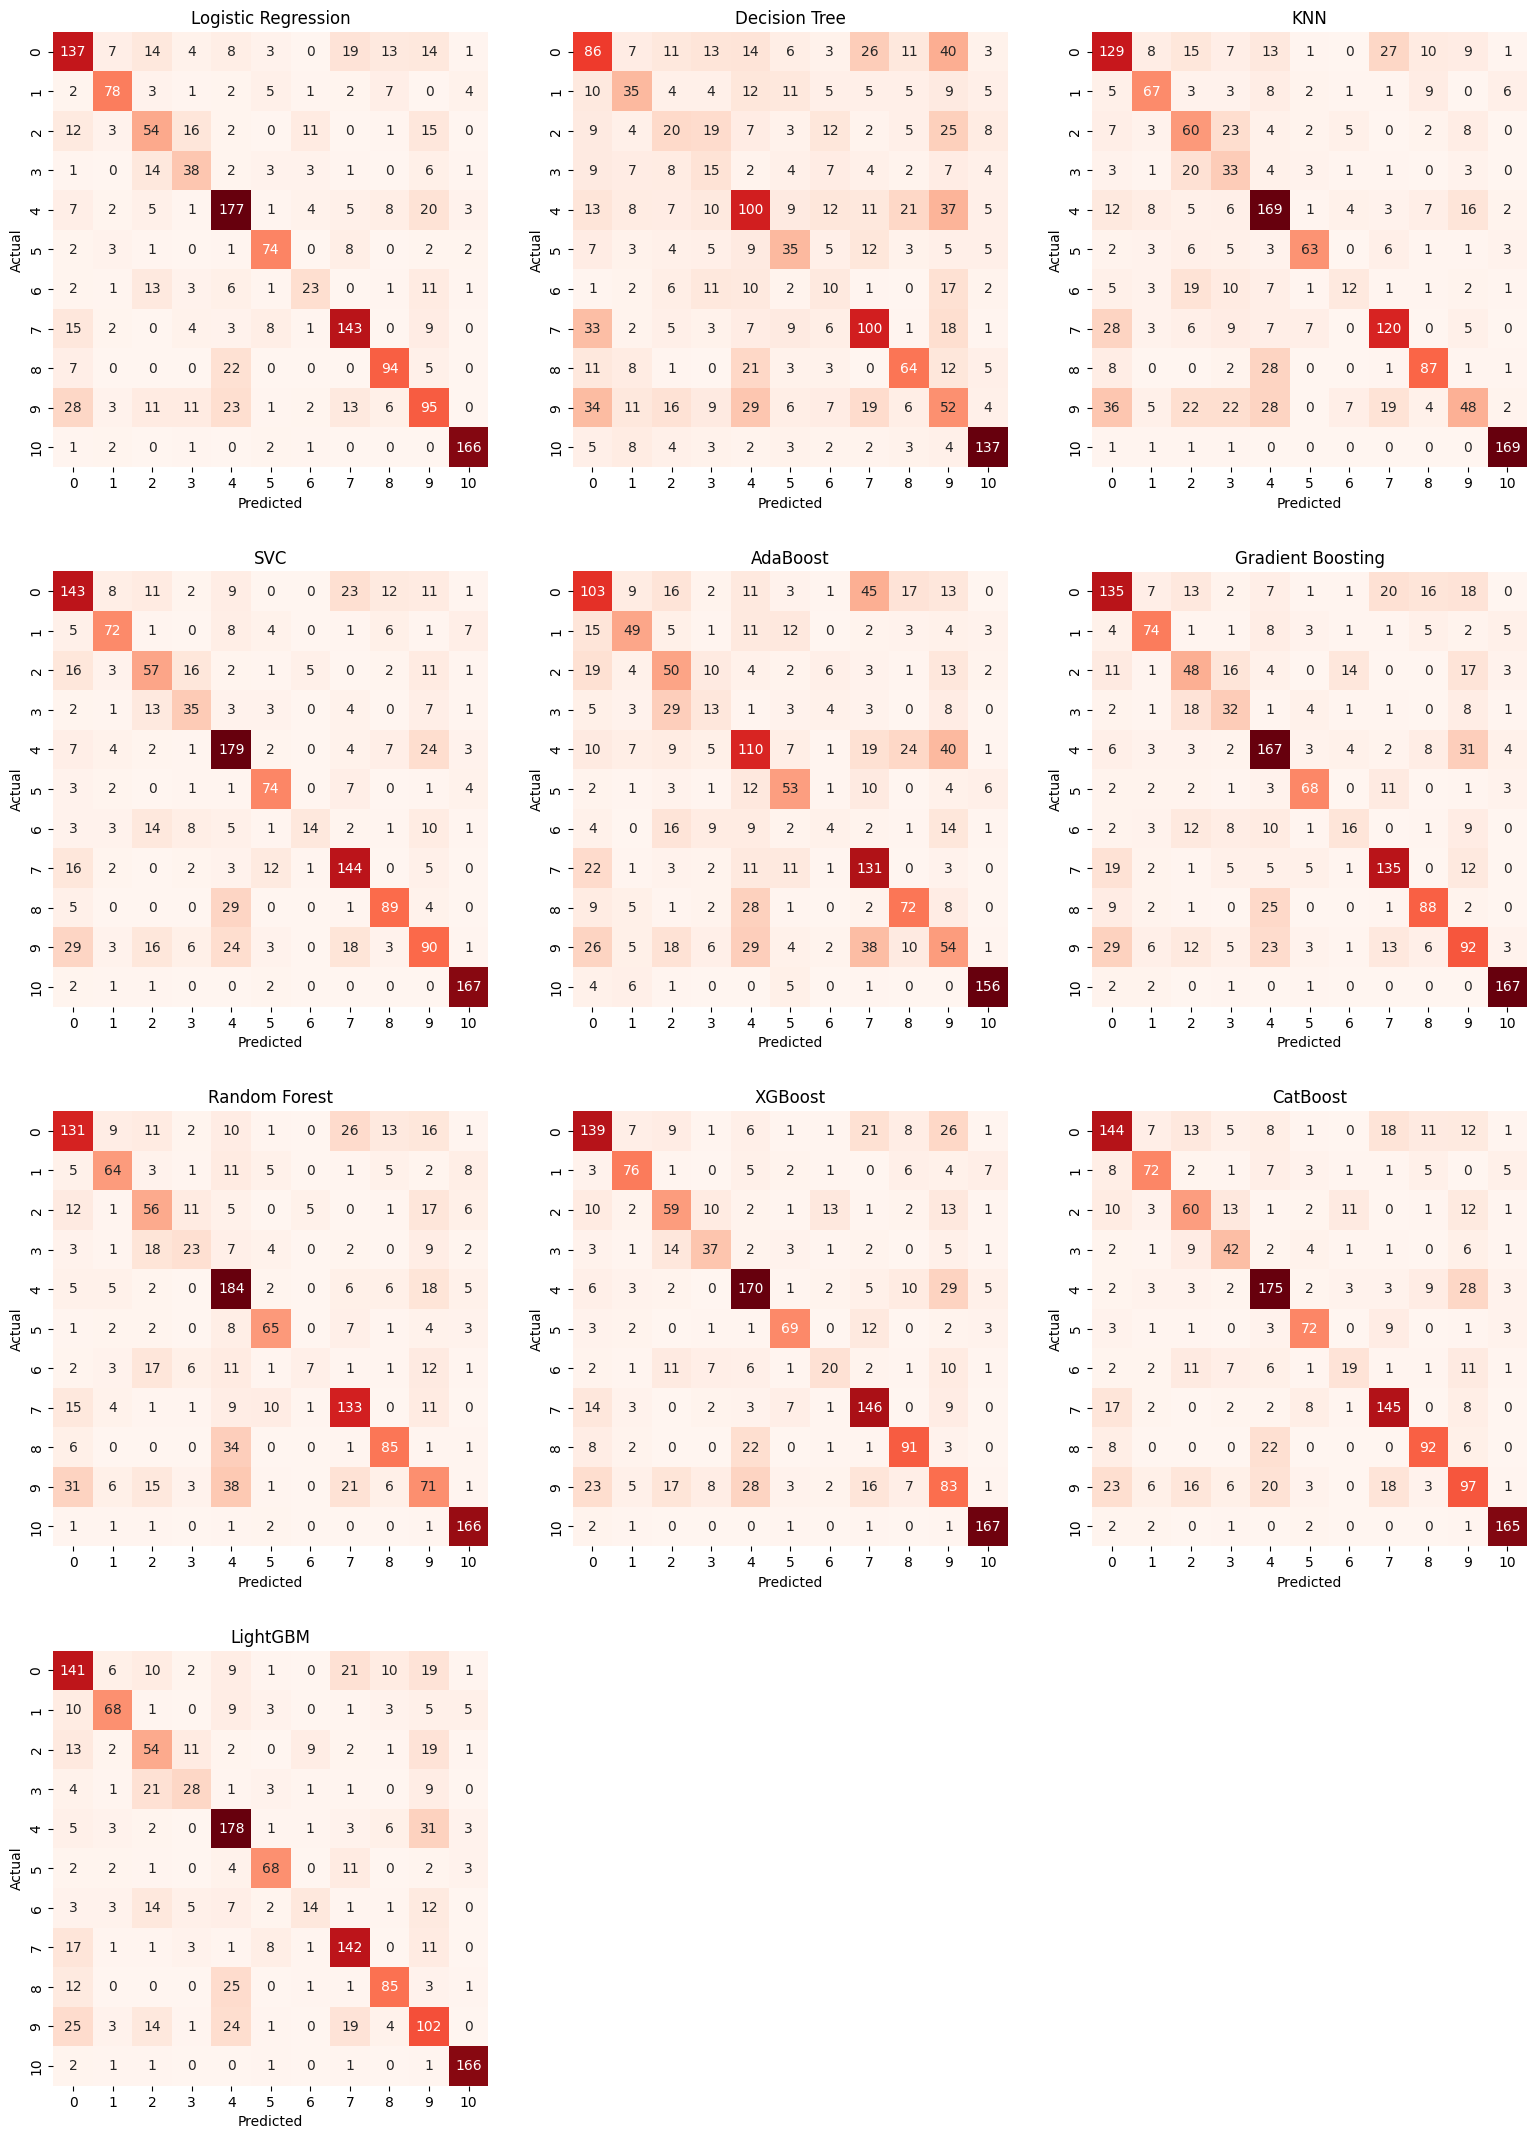

In [12]:
initial_models.Compare_ConfusionMatrices()

In [13]:
initial_performance = initial_models.Compare_Performance()
initial_performance.to_csv('Models/Initial/Unweighted/Performance.csv')
initial_performance

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,Logistic Regression,0.685,0.640,0.772,0.470,0.481,0.720,0.755,0.500,0.749,...,0.757,0.472,0.514,0.739,0.775,0.426,0.761,0.729,0.514,0.946
1,Decision Tree,0.415,0.394,0.368,0.233,0.163,0.469,0.385,0.139,0.549,...,0.350,0.200,0.186,0.448,0.380,0.149,0.545,0.514,0.248,0.778
2,KNN,0.608,0.547,0.657,0.382,0.273,0.624,0.788,0.400,0.670,...,0.647,0.443,0.347,0.671,0.728,0.261,0.659,0.699,0.336,0.944
3,SVC,0.676,0.619,0.727,0.496,0.493,0.681,0.725,0.700,0.706,...,0.706,0.498,0.500,0.722,0.759,0.341,0.740,0.718,0.504,0.930
4,AdaBoost,0.505,0.470,0.544,0.331,0.255,0.487,0.515,0.200,0.512,...,0.503,0.377,0.217,0.479,0.541,0.098,0.594,0.562,0.305,0.910
5,Gradient Boosting,0.649,0.611,0.718,0.432,0.438,0.660,0.764,0.410,0.734,...,0.712,0.427,0.451,0.687,0.747,0.317,0.732,0.698,0.478,0.930
6,Random Forest,0.625,0.618,0.667,0.444,0.489,0.579,0.714,0.538,0.672,...,0.637,0.467,0.397,0.668,0.707,0.187,0.695,0.691,0.400,0.905
7,XGBoost,0.671,0.653,0.738,0.522,0.561,0.694,0.775,0.476,0.705,...,0.731,0.520,0.548,0.711,0.758,0.385,0.745,0.719,0.439,0.928
8,CatBoost,0.688,0.652,0.727,0.522,0.532,0.711,0.735,0.528,0.740,...,0.706,0.524,0.568,0.731,0.754,0.388,0.761,0.736,0.517,0.932
9,LightGBM,0.664,0.603,0.756,0.454,0.560,0.685,0.773,0.519,0.700,...,0.697,0.464,0.471,0.722,0.751,0.315,0.732,0.714,0.501,0.941


In [14]:
import joblib

for key, model in initial_models.get_trained_models().items():
    joblib.dump(model, f"Models/Initial/Unweighted/{key}.pk1")

## Using Class Weights